In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import hvplot.pandas

%matplotlib inline

In [343]:
col_names = ['sensor', 'date', 'temperature', 'humidity', 'pm25',  'pm10',
             'pm_count', 'pm_sensor_count', 'temp_sensor_count', 'corrected']
df = pd.read_csv('../Data/BS Sensors/BS Sensors - Back Data.csv', header=None, names=col_names)

In [344]:
df.sensor.value_counts()

nesta-1    1695
nesta-5    1615
nesta-4    1572
nesta-2    1413
nesta-6     884
nesta-7       4
nesta-8       3
Name: sensor, dtype: int64

In [345]:
df.sensor = df.sensor.replace({'nesta-1': 'Priory Rd S',
                               'nesta-2': 'Priory Rd N',
                               'nesta-4': 'Horseshoe Bridge',
                               'nesta-5': 'Kent Rd'})

In [346]:
g = df.groupby('sensor')

In [347]:
pm25_by_sensor = df[['sensor', 'date', 'pm25']].pivot(values='pm25', index='date', columns='sensor')
temp_by_sensor = df[['sensor', 'date', 'temperature']].pivot(values='temperature', index='date', columns='sensor')

In [348]:
pm25_by_sensor = pm25_by_sensor.drop(['nesta-6', 'nesta-7', 'nesta-8'], axis=1)
temp_by_sensor = temp_by_sensor.drop(['nesta-6', 'nesta-7', 'nesta-8'], axis=1)

In [349]:
pm25_by_sensor.index = pd.to_datetime(pm25_by_sensor.index)
temp_by_sensor.index = pd.to_datetime(temp_by_sensor.index)


In [350]:
pm25_15min = pm25_by_sensor.resample('15Min').mean()
temp_15min = temp_by_sensor.resample('15Min').mean()

In [351]:
pm25_15min.index.min(), pm25_15min.index.max()

(Timestamp('2019-03-15 16:45:00'), Timestamp('2019-04-04 12:00:00'))

In [352]:
pm25_15min.columns

Index(['Horseshoe Bridge', 'Kent Rd', 'Priory Rd N', 'Priory Rd S'], dtype='object', name='sensor')

In [353]:
for col in pm25_15min.columns:
    pm25_15min[col].resample('1H').mean().plot(figsize=(10, 6), grid=True)
    plt.ylim(0, 80)
    plt.xlabel('Date')
    plt.ylabel('$PM_{2.5}$ ($\mu g / m^3$)')
    plt.title(f'PM2.5 in {col}')
    plt.grid(which='minor', axis='x')
    plt.savefig(f'graphs/PM25_WholePeriod_{col.replace(" ", "_")}.png', dpi=300)
    plt.clf()

<Figure size 720x432 with 0 Axes>

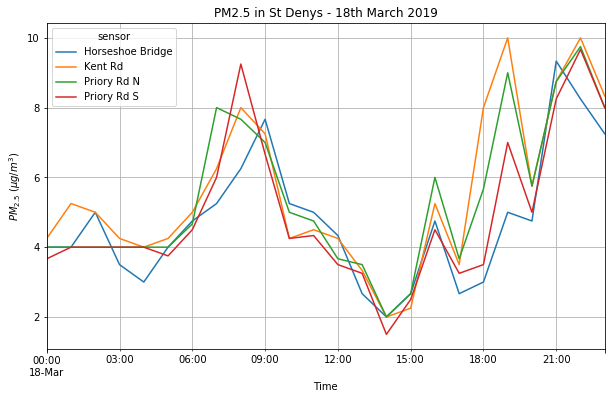

In [354]:
pm25_15min['2019-03-18'].resample('1H').mean().plot(figsize=(10,6))
plt.grid(axis='both', which='minor')
plt.grid(axis='both', which='major')
plt.xlabel('Time')
plt.ylabel('$PM_{2.5}$ ($\mu g / m^3$)')
plt.title('PM2.5 in St Denys - 18th March 2019')
plt.savefig('graphs/PM25_AllSites_2019-03-18.png', dpi=300)

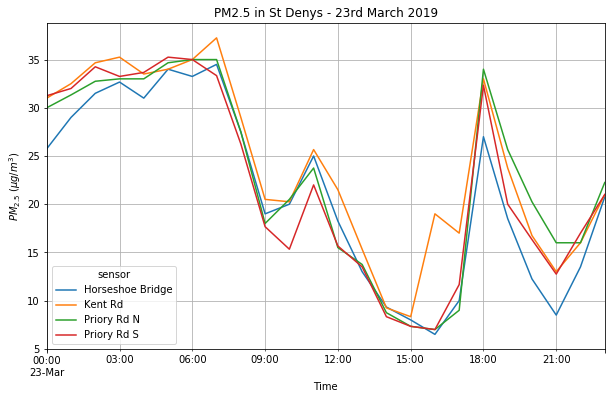

In [355]:
pm25_15min['2019-03-23'].resample('1H').mean().plot(figsize=(10,6))
plt.grid(axis='both', which='minor')
plt.grid(axis='both', which='major')
plt.xlabel('Time')
plt.ylabel('$PM_{2.5}$ ($\mu g / m^3$)')
plt.title('PM2.5 in St Denys - 23rd March 2019')
plt.savefig('graphs/PM25_AllSites_2019-03-23.png', dpi=300)

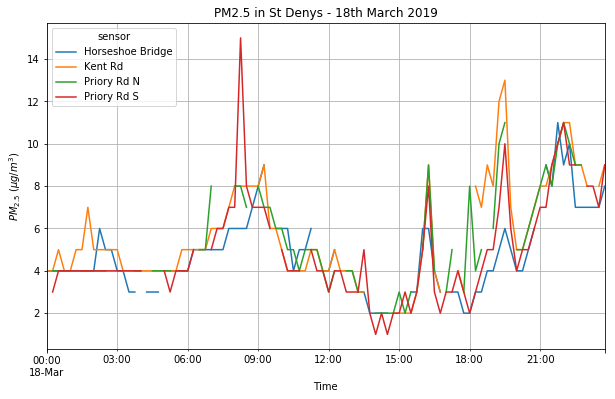

In [356]:
pm25_15min['2019-03-18'].plot(figsize=(10,6))
plt.grid(axis='both', which='minor')
plt.grid(axis='both', which='major')
plt.xlabel('Time')
plt.ylabel('$PM_{2.5}$ ($\mu g / m^3$)')
plt.title('PM2.5 in St Denys - 18th March 2019')
plt.savefig('graphs/PM25_AllSites_2019-03-18_15min.png', dpi=300)

In [357]:
by_day_and_hour = pm25_15min.groupby([pm25_15min.index.dayofweek, pm25_15min.index.hour]).mean()

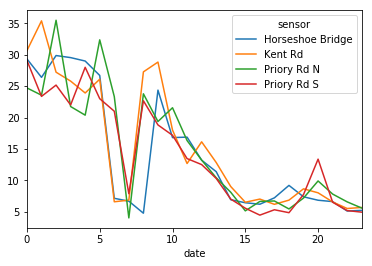

In [358]:
by_day_and_hour.loc[6].plot()

In [359]:
by_hour = pm25_15min.groupby([pm25_15min.index.hour]).mean()

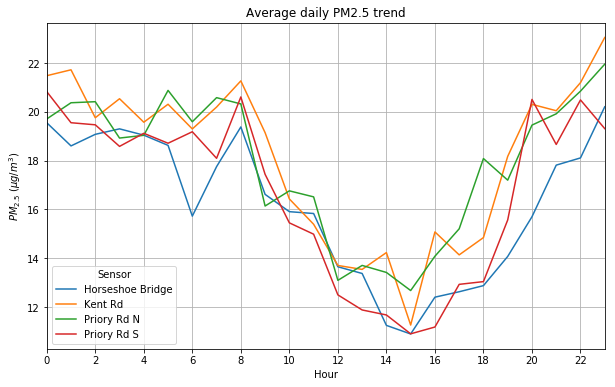

In [360]:
by_hour.plot(figsize=(10, 6), grid=True)
plt.xlabel('Hour')
plt.ylabel('$PM_{2.5}$ ($\mu g / m^3$)')
plt.xticks(np.arange(0, 24, 2))
plt.legend(title="Sensor")
plt.title('Average daily PM2.5 trend')
plt.savefig('graphs/Average_Daily_PM25.png', dpi=300)

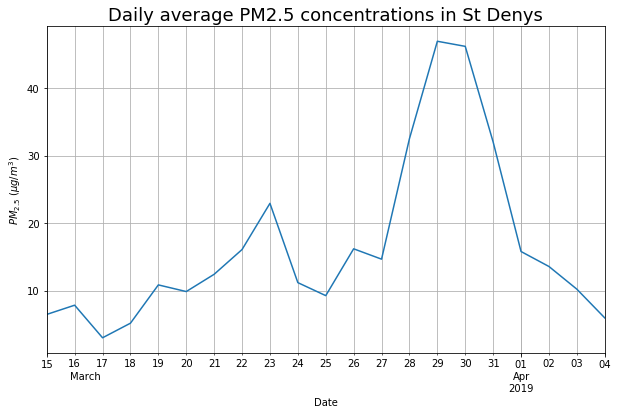

In [362]:
pm25_daily.mean(axis=1).plot(figsize=(10, 6), grid=True)
plt.xlabel('Date')
plt.ylabel('$PM_{2.5}$ ($\mu g / m^3$)')
plt.grid(which='minor', axis='x')
#plt.axhline(10, color='red', linestyle='dotted')
plt.title('Daily average PM2.5 concentrations in St Denys', fontsize=18, )
# plt.annotate('WHO guideline limit',
#              xy=(pd.to_datetime('2019-03-16'), 10),
#              xytext=(10, 30),
#              fontsize=14,
#               textcoords='offset points', arrowprops={'arrowstyle': '->'})
# plt.annotate('Peak in sunny, still weather',
#              xy=(pd.to_datetime('2019-03-29'), 46),
#              xytext=(-300, 0),
#              fontsize=14,
#              textcoords='offset points', arrowprops={'arrowstyle': '->'})
plt.annotate("March", xy=(70, 35), xycoords='figure points')
plt.savefig('graphs/Daily_Average_PM25_Annotated.png', dpi=300)

In [363]:
just_active_sensors = df[df.sensor.isin(['Priory Rd N', 'Priory Rd S', 'Kent Rd', 'Community Centre'])]

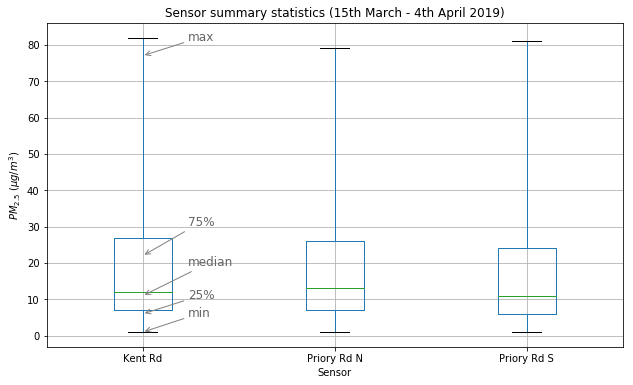

In [364]:
just_active_sensors.boxplot(column='pm25', by='sensor', figsize=(10, 6), whis='range')
plt.title('Sensor summary statistics (15th March - 4th April 2019)')
plt.suptitle('')
plt.xlabel('Sensor')
plt.ylabel('$PM_{2.5}$ ($\mu g / m^3$)')
plt.annotate('median',
             xy=(1, 11),
             xytext=(45, 30),
             fontsize=12,
             color='0.4',
             textcoords='offset points', arrowprops={'arrowstyle': '->', 'color':'gray'})
plt.annotate('75%',
             xy=(1, 22),
             xytext=(45, 30),
             fontsize=12,
             color='0.4',
             textcoords='offset points', arrowprops={'arrowstyle': '->', 'color':'gray'})
plt.annotate('25%',
             xy=(1, 6),
             xytext=(45, 15),
             fontsize=12,
             color='0.4',
             textcoords='offset points', arrowprops={'arrowstyle': '->', 'color':'gray'})
plt.annotate('min',
             xy=(1, 1),
             xytext=(45, 15),
             fontsize=12,
             color='0.4',
             textcoords='offset points', arrowprops={'arrowstyle': '->', 'color':'gray'})
plt.annotate('max',
             xy=(1, 77),
             xytext=(45, 15),
             fontsize=12,
             color='0.4',
             textcoords='offset points', arrowprops={'arrowstyle': '->', 'color':'gray'})
plt.savefig('graphs/Boxplot_by_sensor_PM25.png', dpi=300)

In [365]:
prn = pm25_15min['Priory Rd N']

In [366]:
g = prn.groupby(pd.Grouper(freq='1D'))

In [367]:
def do_plot(df, ax=None):
    hourly_mean = df.groupby(df.index.hour).mean()
    ax.plot(hourly_mean, 'b-', alpha=0.5)

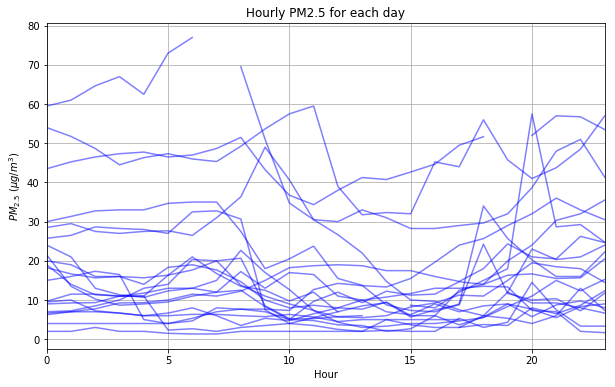

In [368]:
fig, ax = plt.subplots(figsize=(10, 6))
res = g.apply(do_plot, ax=ax)
plt.grid()
plt.ylabel('$PM_{2.5}$ ($\mu g / m^3$)')
plt.xlabel('Hour')
plt.xlim(0, 23)
plt.title('Hourly PM2.5 for each day')
plt.savefig('graphs/Hourly_PM25_EachDay_PrioryRdN.png', dpi=300)

In [369]:
def do_plot(df, ax=None):
    hourly_mean = df.groupby(df.index.hour).mean()
    hourly_mean = hourly_mean / hourly_mean.max()
    ax.plot(hourly_mean, 'b-', alpha=0.5)

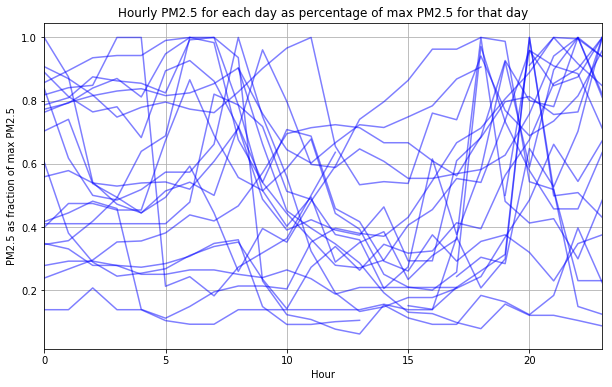

In [370]:
fig, ax = plt.subplots(figsize=(10, 6))
res = g.apply(do_plot, ax=ax)
plt.grid()
plt.ylabel('PM2.5 as fraction of max PM2.5')
plt.xlabel('Hour')
plt.xlim(0, 23)
plt.title('Hourly PM2.5 for each day as percentage of max PM2.5 for that day')
plt.savefig('graphs/Hourly_PM25_EachDay_Scaled.png', dpi=300)

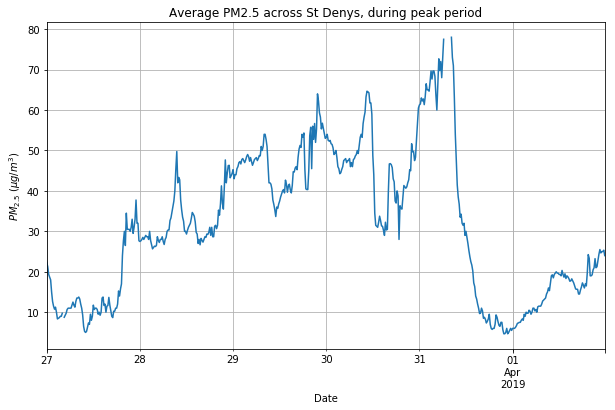

In [371]:
pm25_15min['2019-03-27':'2019-04-01'].mean(axis=1).plot(figsize=(10, 6), grid=True)
plt.grid(which='minor')
plt.title('Average PM2.5 across St Denys, during peak period')
plt.xlabel('Date')
plt.ylabel('$PM_{2.5}$ ($\mu g / m^3$)')
plt.savefig('graphs/Peak_Period.png', dpi=300)

In [225]:
pm25_15min_mean = pm25_15min.mean(axis=1)

In [230]:
diff = pm25_15min['Priory Rd S'] - pm25_15min_mean

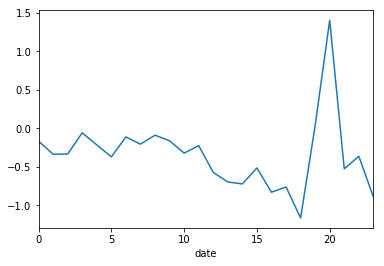

In [231]:
diff.groupby(diff.index.hour).mean().plot()

In [235]:
import sys
sys.path.append('/Users/robin/code/PyAURN')

In [236]:
import importAURN

SOUT = importAURN.importAURN('SOUT', range(2018, 2020))

AURN = SOUT['2019-03-15':'2019-04-04']['PM2.5']

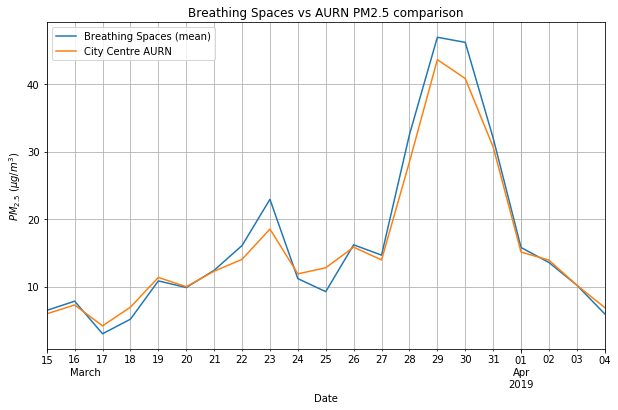

In [293]:
ax = pm25_daily.mean(axis=1).plot(figsize=(10, 6), label='Breathing Spaces (mean)')
AURN.resample('1D').mean().plot(ax=ax, label='City Centre AURN')
plt.grid(which='both', axis='y')
plt.grid(which='both', axis='x')
plt.xlabel('Date')
plt.ylabel('$PM_{2.5}$ ($\mu g / m^3$)')
plt.legend()
plt.title('Breathing Spaces vs AURN PM2.5 comparison')
plt.annotate("March", xy=(70, 35), xycoords='figure points')
plt.savefig('graphs/BreathingSpaces_vs_AURN_Comparison_PM25.png', dpi=300)

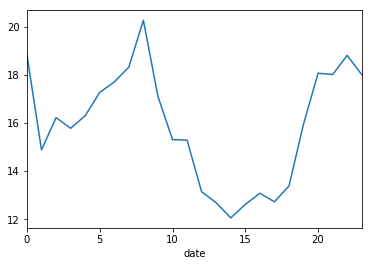

In [255]:
AURN.groupby(AURN.index.hour).mean().plot()

In [256]:
AURN.head()

date
2019-03-15 00:00:00+00:00    6.4
2019-03-15 01:00:00+00:00    3.0
2019-03-15 02:00:00+00:00    7.2
2019-03-15 03:00:00+00:00    7.3
2019-03-15 04:00:00+00:00    8.2
Name: PM2.5, dtype: float64

In [262]:
list(map(str, pd.date_range('2019-03-18', '2019-03-30', freq='D')))

['2019-03-18 00:00:00',
 '2019-03-19 00:00:00',
 '2019-03-20 00:00:00',
 '2019-03-21 00:00:00',
 '2019-03-22 00:00:00',
 '2019-03-23 00:00:00',
 '2019-03-24 00:00:00',
 '2019-03-25 00:00:00',
 '2019-03-26 00:00:00',
 '2019-03-27 00:00:00',
 '2019-03-28 00:00:00',
 '2019-03-29 00:00:00',
 '2019-03-30 00:00:00']

In [ ]:
pm25_15min['2019-03-18'].resample('1H').mean().plot(figsize=(10,6))
plt.grid(axis='both', which='minor')
plt.grid(axis='both', which='major')
plt.xlabel('Time')
plt.ylabel('$PM_{2.5}$ ($\mu g / m^3$)')
plt.title('PM2.5 in St Denys - 18th March 2019')
plt.savefig('graphs/PM25_AllSites_2019-03-18.png', dpi=300)

In [279]:
def day_plot(df):
    plt.clf()
    print(df)
    data = df.resample('1H').mean()
    print(data)
    data.plot(figsize=(10, 6))
    plt.grid(axis='both', which='minor')
    plt.grid(axis='both', which='major')
    plt.xlabel('Time')
    plt.ylabel('$PM_{2.5}$ ($\mu g / m^3$)')
    date_str = df.index[0].strftime('%Y-%m-%d')
    plt.title(f'PM2.5 in St Denys - f{date_str}')
    plt.savefig(f'graphs/Daily_Plot_{date_str}.png')
    plt.clf()

In [283]:
pm25_15min.resample('1D').apply(lambda x: print(x.shape))

(29,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(49,)
(29,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(49,)
(29,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(49,)
(29,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(96,)
(49,)


sensor,Community Centre,Kent Rd,Priory Rd N,Priory Rd S
date,,,,
2019-03-15,NaN,NaN,NaN,NaN
2019-03-16,NaN,NaN,NaN,NaN
2019-03-17,NaN,NaN,NaN,NaN
2019-03-18,NaN,NaN,NaN,NaN
2019-03-19,NaN,NaN,NaN,NaN
2019-03-20,NaN,NaN,NaN,NaN
2019-03-21,NaN,NaN,NaN,NaN
2019-03-22,NaN,NaN,NaN,NaN
2019-03-23,NaN,NaN,NaN,NaN


2019-03-15 16:45:00    NaN
2019-03-15 17:00:00    2.0
2019-03-15 17:15:00    3.0
2019-03-15 17:30:00    3.0
2019-03-15 17:45:00    4.0
2019-03-15 18:00:00    4.0
2019-03-15 18:15:00    NaN
2019-03-15 18:30:00    4.0
2019-03-15 18:45:00    NaN
2019-03-15 19:00:00    3.0
2019-03-15 19:15:00    3.0
2019-03-15 19:30:00    NaN
2019-03-15 19:45:00    5.0
2019-03-15 20:00:00    4.0
2019-03-15 20:15:00    5.0
2019-03-15 20:30:00    5.0
2019-03-15 20:45:00    6.0
2019-03-15 21:00:00    6.0
2019-03-15 21:15:00    5.0
2019-03-15 21:30:00    6.0
2019-03-15 21:45:00    6.0
2019-03-15 22:00:00    6.0
2019-03-15 22:15:00    6.0
2019-03-15 22:30:00    8.0
2019-03-15 22:45:00    8.0
2019-03-15 23:00:00    9.0
2019-03-15 23:15:00    8.0
2019-03-15 23:30:00    8.0
2019-03-15 23:45:00    9.0
Name: Community Centre, dtype: float64
2019-03-15 16:00:00         NaN
2019-03-15 17:00:00    3.000000
2019-03-15 18:00:00    4.000000
2019-03-15 19:00:00    3.666667
2019-03-15 20:00:00    5.000000
2019-03-15 21:00:0

2019-03-19 00:00:00     7.0
2019-03-19 00:15:00     6.0
2019-03-19 00:30:00     6.0
2019-03-19 00:45:00     NaN
2019-03-19 01:00:00    10.0
2019-03-19 01:15:00     7.0
2019-03-19 01:30:00     6.0
2019-03-19 01:45:00     6.0
2019-03-19 02:00:00     6.0
2019-03-19 02:15:00     6.0
2019-03-19 02:30:00     8.0
2019-03-19 02:45:00    10.0
2019-03-19 03:00:00    12.0
2019-03-19 03:15:00    10.0
2019-03-19 03:30:00    11.0
2019-03-19 03:45:00    11.0
2019-03-19 04:00:00     NaN
2019-03-19 04:15:00    11.0
2019-03-19 04:30:00    11.0
2019-03-19 04:45:00    11.0
2019-03-19 05:00:00    11.0
2019-03-19 05:15:00    12.0
2019-03-19 05:30:00     NaN
2019-03-19 05:45:00     NaN
2019-03-19 06:00:00    14.0
2019-03-19 06:15:00    14.0
2019-03-19 06:30:00     NaN
2019-03-19 06:45:00    16.0
2019-03-19 07:00:00    14.0
2019-03-19 07:15:00    13.0
                       ... 
2019-03-19 16:30:00     NaN
2019-03-19 16:45:00     6.0
2019-03-19 17:00:00     6.0
2019-03-19 17:15:00     6.0
2019-03-19 17:30:00 

2019-03-24 00:00:00    21.0
2019-03-24 00:15:00    19.0
2019-03-24 00:30:00     NaN
2019-03-24 00:45:00    22.0
2019-03-24 01:00:00    24.0
2019-03-24 01:15:00    21.0
2019-03-24 01:30:00     NaN
2019-03-24 01:45:00    14.0
2019-03-24 02:00:00    11.0
2019-03-24 02:15:00    11.0
2019-03-24 02:30:00     NaN
2019-03-24 02:45:00    12.0
2019-03-24 03:00:00    10.0
2019-03-24 03:15:00     9.0
2019-03-24 03:30:00    11.0
2019-03-24 03:45:00     NaN
2019-03-24 04:00:00    14.0
2019-03-24 04:15:00    14.0
2019-03-24 04:30:00    12.0
2019-03-24 04:45:00    12.0
2019-03-24 05:00:00    11.0
2019-03-24 05:15:00    11.0
2019-03-24 05:30:00    10.0
2019-03-24 05:45:00    10.0
2019-03-24 06:00:00    11.0
2019-03-24 06:15:00    13.0
2019-03-24 06:30:00    13.0
2019-03-24 06:45:00    13.0
2019-03-24 07:00:00    13.0
2019-03-24 07:15:00    12.0
                       ... 
2019-03-24 16:30:00     5.0
2019-03-24 16:45:00     6.0
2019-03-24 17:00:00     7.0
2019-03-24 17:15:00     8.0
2019-03-24 17:30:00 

2019-03-27 00:00:00    18.000000
2019-03-27 01:00:00    11.500000
2019-03-27 02:00:00     9.000000
2019-03-27 03:00:00     7.500000
2019-03-27 04:00:00     8.000000
2019-03-27 05:00:00     9.000000
2019-03-27 06:00:00    11.000000
2019-03-27 07:00:00    13.500000
2019-03-27 08:00:00    15.250000
2019-03-27 09:00:00     8.500000
2019-03-27 10:00:00     5.750000
2019-03-27 11:00:00     9.000000
2019-03-27 12:00:00    11.500000
2019-03-27 13:00:00    10.000000
2019-03-27 14:00:00    12.666667
2019-03-27 15:00:00    10.333333
2019-03-27 16:00:00     9.250000
2019-03-27 17:00:00     8.500000
2019-03-27 18:00:00    16.250000
2019-03-27 19:00:00    20.666667
2019-03-27 20:00:00    27.000000
2019-03-27 21:00:00    26.750000
2019-03-27 22:00:00    24.500000
2019-03-27 23:00:00    32.500000
Freq: H, Name: Community Centre, dtype: float64
2019-03-28 00:00:00    28.0
2019-03-28 00:15:00    29.0
2019-03-28 00:30:00     NaN
2019-03-28 00:45:00    29.0
2019-03-28 01:00:00     NaN
2019-03-28 01:15:00 

2019-03-31 00:00:00    65.0
2019-03-31 00:15:00     NaN
2019-03-31 00:30:00    65.0
2019-03-31 00:45:00    66.0
2019-03-31 01:00:00    66.0
2019-03-31 01:15:00     NaN
2019-03-31 01:30:00    65.0
2019-03-31 01:45:00    65.0
2019-03-31 02:00:00    66.0
2019-03-31 02:15:00    67.0
2019-03-31 02:30:00    67.0
2019-03-31 02:45:00     NaN
2019-03-31 03:00:00    70.0
2019-03-31 03:15:00    72.0
2019-03-31 03:30:00    72.0
2019-03-31 03:45:00    73.0
2019-03-31 04:00:00    70.0
2019-03-31 04:15:00    63.0
2019-03-31 04:30:00    60.0
2019-03-31 04:45:00    69.0
2019-03-31 05:00:00    70.0
2019-03-31 05:15:00    72.0
2019-03-31 05:30:00    77.0
2019-03-31 05:45:00     NaN
2019-03-31 06:00:00     NaN
2019-03-31 06:15:00     NaN
2019-03-31 06:30:00     NaN
2019-03-31 06:45:00     NaN
2019-03-31 07:00:00     NaN
2019-03-31 07:15:00     NaN
                       ... 
2019-03-31 16:30:00     9.0
2019-03-31 16:45:00     9.0
2019-03-31 17:00:00     8.0
2019-03-31 17:15:00     NaN
2019-03-31 17:30:00 

2019-04-04 00:00:00     7.0
2019-04-04 00:15:00     8.0
2019-04-04 00:30:00     8.0
2019-04-04 00:45:00     NaN
2019-04-04 01:00:00     9.0
2019-04-04 01:15:00     8.0
2019-04-04 01:30:00    11.0
2019-04-04 01:45:00     8.0
2019-04-04 02:00:00     7.0
2019-04-04 02:15:00     7.0
2019-04-04 02:30:00     NaN
2019-04-04 02:45:00    10.0
2019-04-04 03:00:00    10.0
2019-04-04 03:15:00    10.0
2019-04-04 03:30:00    11.0
2019-04-04 03:45:00    11.0
2019-04-04 04:00:00    11.0
2019-04-04 04:15:00     NaN
2019-04-04 04:30:00     6.0
2019-04-04 04:45:00     2.0
2019-04-04 05:00:00     2.0
2019-04-04 05:15:00     NaN
2019-04-04 05:30:00     3.0
2019-04-04 05:45:00     2.0
2019-04-04 06:00:00     3.0
2019-04-04 06:15:00     3.0
2019-04-04 06:30:00     2.0
2019-04-04 06:45:00     2.0
2019-04-04 07:00:00     2.0
2019-04-04 07:15:00     2.0
2019-04-04 07:30:00     2.0
2019-04-04 07:45:00     NaN
2019-04-04 08:00:00     2.0
2019-04-04 08:15:00     3.0
2019-04-04 08:30:00     NaN
2019-04-04 08:45:00 

2019-03-19 00:00:00     8.0
2019-03-19 00:15:00     7.0
2019-03-19 00:30:00     7.0
2019-03-19 00:45:00     7.0
2019-03-19 01:00:00     8.0
2019-03-19 01:15:00     8.0
2019-03-19 01:30:00     8.0
2019-03-19 01:45:00     8.0
2019-03-19 02:00:00     8.0
2019-03-19 02:15:00     8.0
2019-03-19 02:30:00     9.0
2019-03-19 02:45:00     8.0
2019-03-19 03:00:00     9.0
2019-03-19 03:15:00     9.0
2019-03-19 03:30:00    12.0
2019-03-19 03:45:00    14.0
2019-03-19 04:00:00    13.0
2019-03-19 04:15:00    14.0
2019-03-19 04:30:00    15.0
2019-03-19 04:45:00     NaN
2019-03-19 05:00:00    13.0
2019-03-19 05:15:00    13.0
2019-03-19 05:30:00    16.0
2019-03-19 05:45:00    18.0
2019-03-19 06:00:00    18.0
2019-03-19 06:15:00    19.0
2019-03-19 06:30:00    19.0
2019-03-19 06:45:00    19.0
2019-03-19 07:00:00    21.0
2019-03-19 07:15:00    20.0
                       ... 
2019-03-19 16:30:00    10.0
2019-03-19 16:45:00     9.0
2019-03-19 17:00:00     8.0
2019-03-19 17:15:00     9.0
2019-03-19 17:30:00 

2019-03-23 00:00:00     NaN
2019-03-23 00:15:00     NaN
2019-03-23 00:30:00    31.0
2019-03-23 00:45:00    31.0
2019-03-23 01:00:00    32.0
2019-03-23 01:15:00    32.0
2019-03-23 01:30:00    32.0
2019-03-23 01:45:00    34.0
2019-03-23 02:00:00    34.0
2019-03-23 02:15:00    32.0
2019-03-23 02:30:00     NaN
2019-03-23 02:45:00    38.0
2019-03-23 03:00:00    38.0
2019-03-23 03:15:00    35.0
2019-03-23 03:30:00    33.0
2019-03-23 03:45:00    35.0
2019-03-23 04:00:00    34.0
2019-03-23 04:15:00    34.0
2019-03-23 04:30:00    33.0
2019-03-23 04:45:00    33.0
2019-03-23 05:00:00    33.0
2019-03-23 05:15:00    35.0
2019-03-23 05:30:00    34.0
2019-03-23 05:45:00    34.0
2019-03-23 06:00:00    34.0
2019-03-23 06:15:00    33.0
2019-03-23 06:30:00    35.0
2019-03-23 06:45:00    38.0
2019-03-23 07:00:00    37.0
2019-03-23 07:15:00    38.0
                       ... 
2019-03-23 16:30:00     NaN
2019-03-23 16:45:00    35.0
2019-03-23 17:00:00    16.0
2019-03-23 17:15:00    15.0
2019-03-23 17:30:00 

2019-03-28 00:00:00    26.0
2019-03-28 00:15:00    26.0
2019-03-28 00:30:00    28.0
2019-03-28 00:45:00    29.0
2019-03-28 01:00:00    29.0
2019-03-28 01:15:00    28.0
2019-03-28 01:30:00    30.0
2019-03-28 01:45:00     NaN
2019-03-28 02:00:00    29.0
2019-03-28 02:15:00    28.0
2019-03-28 02:30:00     NaN
2019-03-28 02:45:00    28.0
2019-03-28 03:00:00    28.0
2019-03-28 03:15:00    28.0
2019-03-28 03:30:00    27.0
2019-03-28 03:45:00    26.0
2019-03-28 04:00:00    26.0
2019-03-28 04:15:00    27.0
2019-03-28 04:30:00    30.0
2019-03-28 04:45:00    30.0
2019-03-28 05:00:00    28.0
2019-03-28 05:15:00    28.0
2019-03-28 05:30:00    29.0
2019-03-28 05:45:00    30.0
2019-03-28 06:00:00    28.0
2019-03-28 06:15:00    28.0
2019-03-28 06:30:00    27.0
2019-03-28 06:45:00    30.0
2019-03-28 07:00:00    31.0
2019-03-28 07:15:00    31.0
                       ... 
2019-03-28 16:30:00    30.0
2019-03-28 16:45:00    30.0
2019-03-28 17:00:00    32.0
2019-03-28 17:15:00    32.0
2019-03-28 17:30:00 

KeyboardInterrupt: 

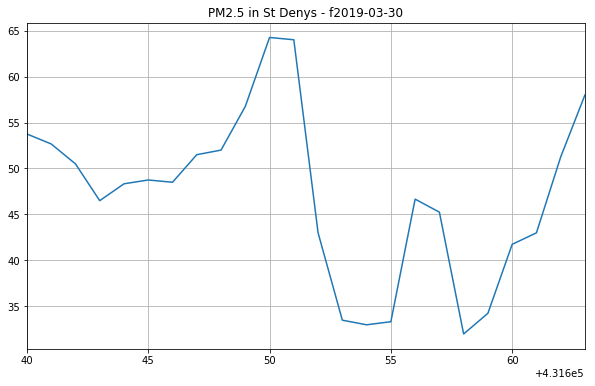

In [280]:
pm25_15min.resample('1D').apply(day_plot)

In [284]:
pm25_15min

sensor,Community Centre,Kent Rd,Priory Rd N,Priory Rd S
date,,,,
2019-03-15 16:45:00,NaN,NaN,NaN,NaN
2019-03-15 17:00:00,2.0,2.0,3.0,2.0
2019-03-15 17:15:00,3.0,3.0,3.0,2.0
2019-03-15 17:30:00,3.0,3.0,NaN,2.0
2019-03-15 17:45:00,4.0,3.0,3.0,3.0
2019-03-15 18:00:00,4.0,3.0,3.0,3.0
2019-03-15 18:15:00,NaN,3.0,4.0,3.0
2019-03-15 18:30:00,4.0,3.0,3.0,NaN
2019-03-15 18:45:00,NaN,4.0,5.0,4.0


In [285]:
df

,sensor,date,temperature,humidity,pm25,pm10,pm_count,pm_sensor_count,temp_sensor_count,corrected
0,nesta-6,2019-03-15 16:56:27.243513,14,16,1,2,5,7,2,NaN
1,Priory Rd N,2019-03-15 17:00:10.434508,21,39,3,3,20,8,1,NaN
2,Kent Rd,2019-03-15 17:00:10.458859,21,49,2,3,22,8,1,NaN
3,nesta-6,2019-03-15 17:00:14.110464,14,16,1,2,5,7,2,NaN
4,Priory Rd S,2019-03-15 17:00:19.032682,19,68,2,3,19,8,1,NaN
5,Community Centre,2019-03-15 17:00:19.463420,19,67,2,3,20,8,1,NaN
6,Kent Rd,2019-03-15 17:15:08.717097,20,50,3,3,23,8,1,NaN
7,Priory Rd N,2019-03-15 17:15:08.997608,21,39,3,3,21,8,1,NaN
8,nesta-6,2019-03-15 17:15:12.410036,14,16,1,2,5,7,2,NaN
9,Community Centre,2019-03-15 17:15:16.473176,19,67,3,3,23,8,1,NaN
